In [5]:
# !pip install keras==2.3.1
# !pip install tensorflow==2.2

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
seed  = 7
forestfire = pd.read_csv('D:/ExcelRassignments/Assignment16/forestfires.csv')

In [8]:
forestfire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## EDA

In [9]:
forestfire_df = forestfire.copy()

In [10]:
forestfire_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [11]:
forestfire_df1=forestfire_df.drop(['dayfri','daymon','daysat','daysun','daytue','daywed','monthapr','monthaug','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep','daythu','monthdec','size_category'], axis=1)

In [12]:
forestfire_df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [13]:
forestfire_df1.shape

(517, 11)

In [14]:
forestfire_df1[forestfire_df1.duplicated()].shape

(8, 11)

In [15]:
forestfire_df1=forestfire_df1.drop_duplicates()

In [16]:
forestfire_df1[forestfire_df1.duplicated()].shape

(0, 11)

<AxesSubplot:>

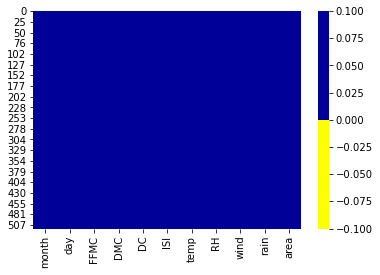

In [18]:
import seaborn as sns
cols = forestfire_df1.columns
colours = ['#ffff00', '#000099']
sns.heatmap(forestfire_df1[cols].isnull(), cmap=sns.color_palette(colours))

In [19]:
forestfire_df1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [20]:
forestfire_df1.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


## Scatter Plot & Correlation Analysis

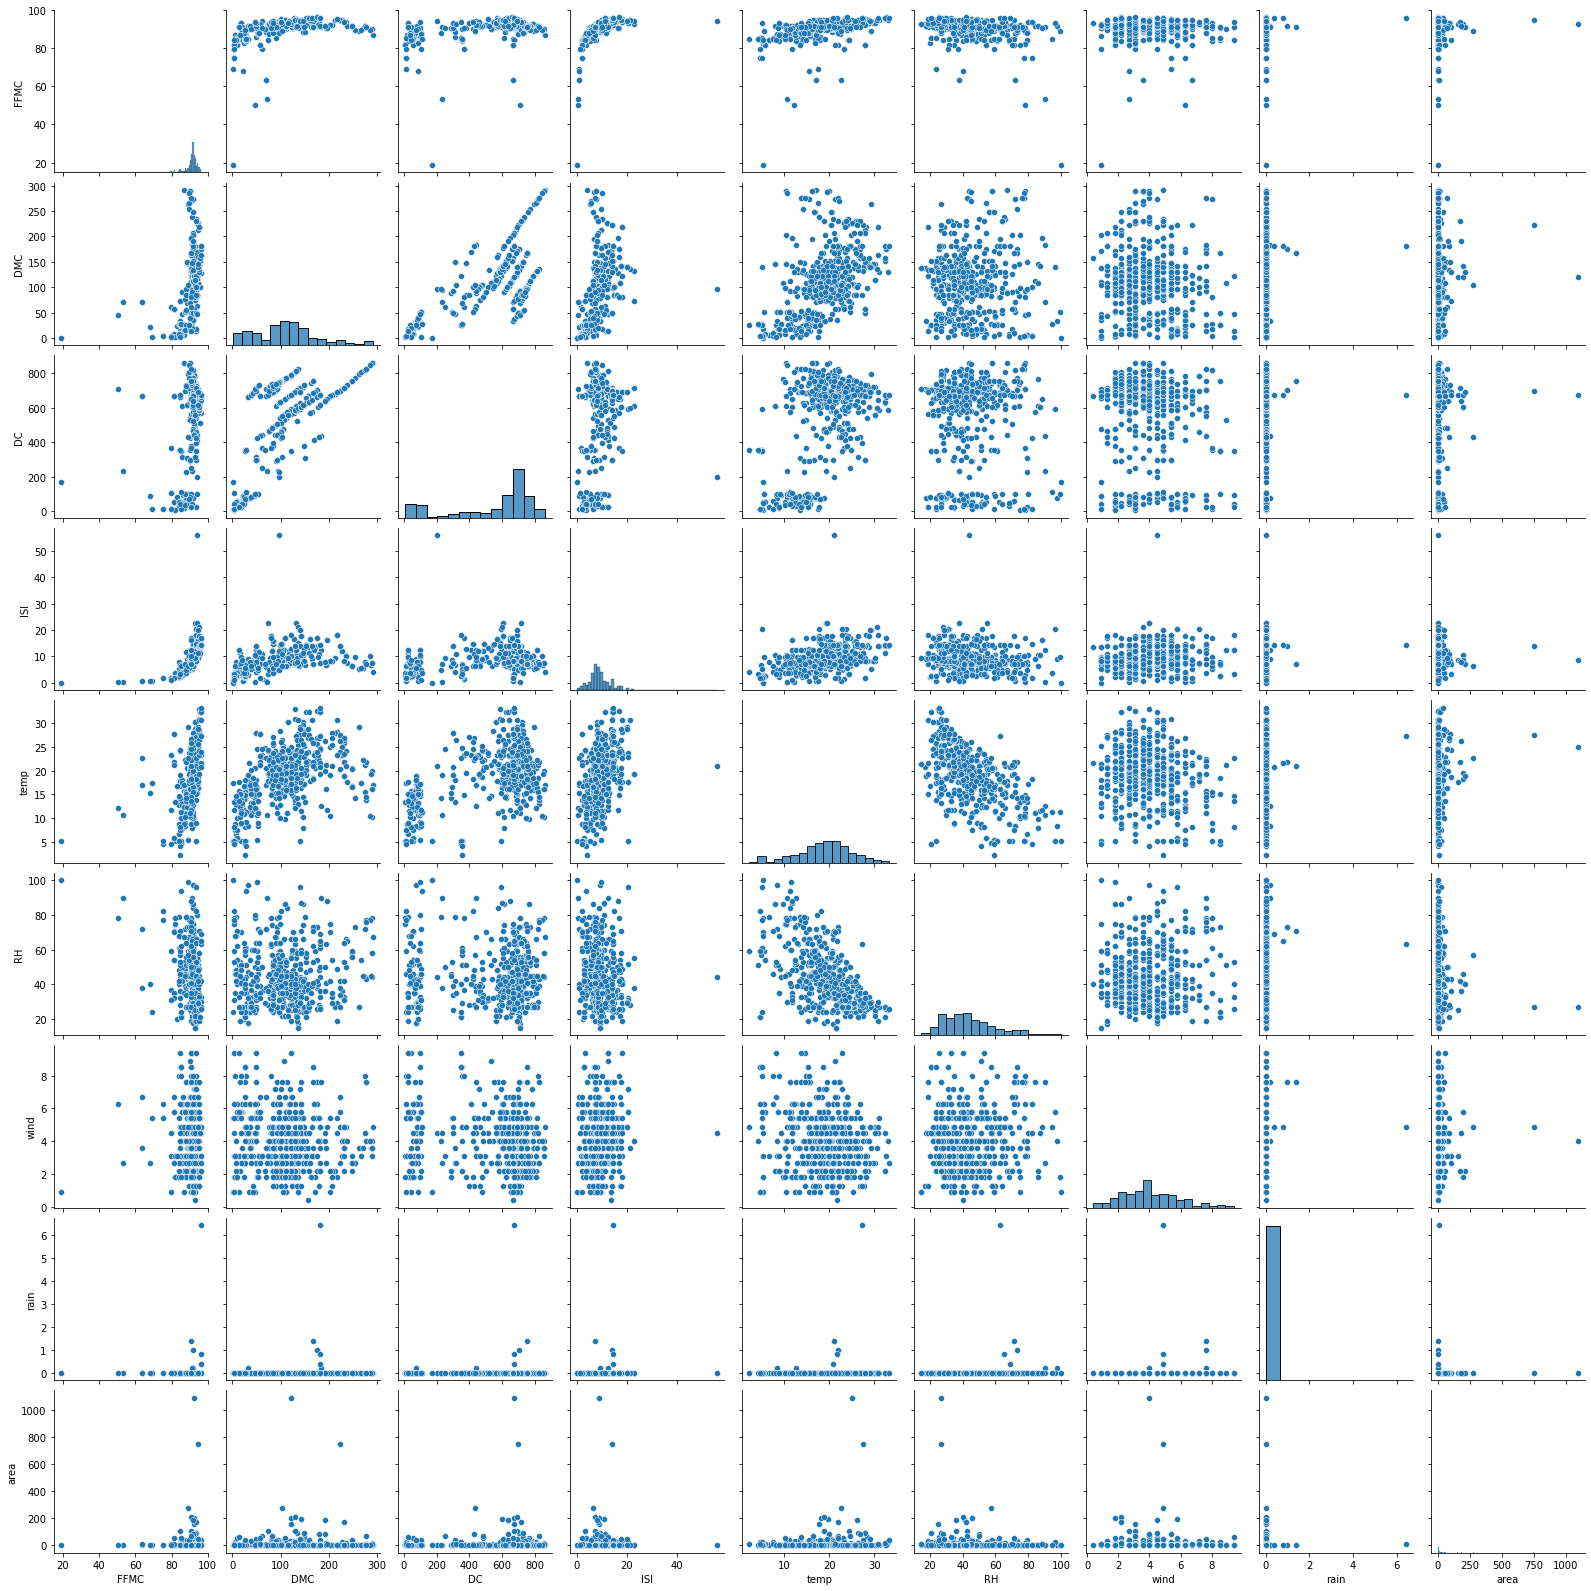

In [23]:
sns.pairplot(forestfire_df1)
plt.show()

In [26]:
# !pip install sweetviz

In [27]:
import sweetviz as sv
sweet_report = sv.analyze(forestfire_df1)
sweet_report.show_html("Forestfire_EDA_Report.html")

                                             |                                             | [  0%]   00:00 ->…

Report Forestfire_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Label Encoder

In [28]:
labelencoder = LabelEncoder()

In [29]:
cols = ['month', 'day']

In [30]:
forestfire_df1[cols]=forestfire_df1[cols].apply(LabelEncoder().fit_transform)

In [31]:
forestfire_df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Neural Network Model

In [33]:
import numpy as np

In [34]:
seed = 7
np.random.seed(seed)

In [35]:
forestfire_df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Splitting Data into Training and Testing Dataset

In [36]:
x = forestfire_df1.iloc[:,0:10]
y = forestfire_df1['area']

In [37]:
x.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=40)

In [39]:
model = keras.Sequential()
model.add(Dense(15, input_dim= 10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [42]:
history = model.fit(x,y, validation_split=0.33, epochs=125, batch_size=10)

Train on 341 samples, validate on 168 samples
Epoch 1/125
341/341 [==============================] - 0s 663us/step - loss: 4062.5975 - accuracy: 0.0850 - val_loss: 4206.5291 - val_accuracy: 0.0060
Epoch 2/125
341/341 [==============================] - 0s 137us/step - loss: 4068.4810 - accuracy: 0.0000e+00 - val_loss: 4207.5103 - val_accuracy: 0.0000e+00
Epoch 3/125
341/341 [==============================] - 0s 132us/step - loss: 4054.8268 - accuracy: 0.0000e+00 - val_loss: 4232.7736 - val_accuracy: 0.0000e+00
Epoch 4/125
341/341 [==============================] - 0s 148us/step - loss: 4074.0044 - accuracy: 0.0088 - val_loss: 4211.0647 - val_accuracy: 0.0000e+00
Epoch 5/125
341/341 [==============================] - 0s 121us/step - loss: 4073.4589 - accuracy: 0.0029 - val_loss: 4218.8030 - val_accuracy: 0.0000e+00
Epoch 6/125
341/341 [==============================] - 0s 123us/step - loss: 4065.5989 - accuracy: 0.0117 - val_loss: 4224.0872 - val_accuracy: 0.0000e+00
Epoch 7/125
341/341 

341/341 [==============================] - 0s 126us/step - loss: 4022.3270 - accuracy: 0.0264 - val_loss: 4162.9028 - val_accuracy: 0.0060
Epoch 54/125
341/341 [==============================] - 0s 119us/step - loss: 4011.8131 - accuracy: 0.0176 - val_loss: 4162.2898 - val_accuracy: 0.0060
Epoch 55/125
341/341 [==============================] - 0s 120us/step - loss: 4015.6693 - accuracy: 0.0176 - val_loss: 4161.6919 - val_accuracy: 0.0060
Epoch 56/125
341/341 [==============================] - 0s 120us/step - loss: 4035.4238 - accuracy: 0.0293 - val_loss: 4162.4560 - val_accuracy: 0.0060
Epoch 57/125
341/341 [==============================] - 0s 98us/step - loss: 4022.4962 - accuracy: 0.0088 - val_loss: 4161.6496 - val_accuracy: 0.0179
Epoch 58/125
341/341 [==============================] - 0s 172us/step - loss: 4025.6826 - accuracy: 0.0176 - val_loss: 4163.4129 - val_accuracy: 0.0119
Epoch 59/125
341/341 [==============================] - 0s 141us/step - loss: 4007.2855 - accuracy: 0.

Epoch 107/125
341/341 [==============================] - 0s 126us/step - loss: 3997.6786 - accuracy: 0.0264 - val_loss: 4155.6509 - val_accuracy: 0.0179
Epoch 108/125
341/341 [==============================] - 0s 105us/step - loss: 3983.1390 - accuracy: 0.0323 - val_loss: 4155.6912 - val_accuracy: 0.0119
Epoch 109/125
341/341 [==============================] - 0s 162us/step - loss: 4015.1770 - accuracy: 0.0352 - val_loss: 4152.4708 - val_accuracy: 0.0179
Epoch 110/125
341/341 [==============================] - 0s 153us/step - loss: 4005.9166 - accuracy: 0.0557 - val_loss: 4159.0556 - val_accuracy: 0.0238
Epoch 111/125
341/341 [==============================] - 0s 144us/step - loss: 3983.4932 - accuracy: 0.0352 - val_loss: 4154.4884 - val_accuracy: 0.0179
Epoch 112/125
341/341 [==============================] - 0s 153us/step - loss: 3995.1943 - accuracy: 0.0235 - val_loss: 4155.6496 - val_accuracy: 0.0119
Epoch 113/125
341/341 [==============================] - 0s 101us/step - loss: 400

In [43]:
scores = model.evaluate(x,y)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

509/509 [==============================] - 0s 22us/step
accuracy: 4.32%


In [44]:
# Visualize training history
#list all datain history
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [45]:
pred = model.predict(x_test)

In [46]:
from sklearn import metrics

score = metrics.mean_squared_error(pred, y_test)
print('Final score (MSE): {}'.format(score))

Final score (MSE): 3898.7638673899833


In [47]:
score1 = np.sqrt(metrics.mean_squared_error(pred, y_test))
print('Final score (RMSE): {}'.format(score1))

Final score (RMSE): 62.44008221799506


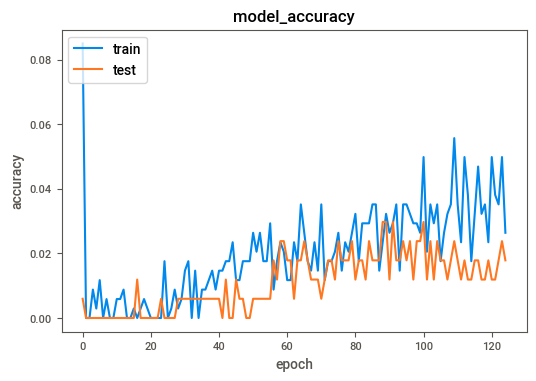

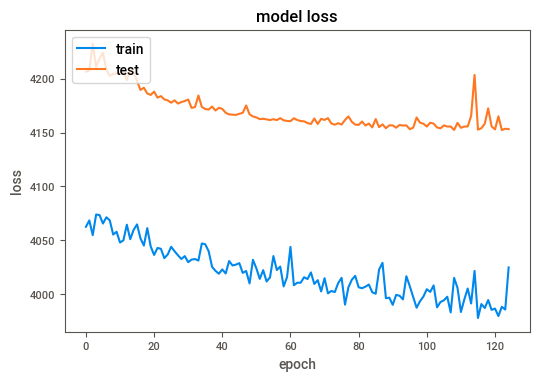

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

## Interpretation

### The Burned area of forestfires is 3.34% according to our regression model.